

# Install Library


In [ ]:
pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 8.7 MB/s 


In [ ]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 7.9 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=ec055128e22c9e80d01aa64d10ba26c040ccfff3b2004c6176c0b36f7e04eb5d
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Understanding Data

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import string
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from wordcloud import WordCloud
from nltk.tokenize import wordpunct_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory #untuk stemming
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory #untuk stopword
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
nltk.download('punkt')

from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Import Data

In [ ]:
pd.set_option('display.max_colwidth', None)
data = pd.read_excel("/content/drive/MyDrive/smt 8/data scraping shopee/scrapinggg/DATASET.xlsx")
data

,ID_PRODUK,ULASAN,RATING,LABEL
0,AA,"Fitur Terbaik:mirip hp jadul\nSepadan dengan Harga:harga yang pantas 155 ribu\n\nHp nya super lemot ,batre cepat terkuras dlm hitungan detik.jaringan buruk internetan bikin emosi.sangat tidak memuaskan. Semua orang beranggapan dan memberi saran kepada saya bahwa saya kena tipu.",1,N
1,AA,hp apaan a hp mgak berguna nysel saya pesan,1,N
2,AA,Kurang memuaskan tak sesuai penawaran,1,N
3,AA,"Baterai nya cepat habis, jaringan nya lemot pula",3,N
4,AA,L. E. M. O. T,3,N
...,...,...,...,...
1054,CF,"Kualitas harga sangat bagus, saya memilih yang ini dibagikan dengan beberapa pengguna keluarga rambut ekstra membuat peralihan antar profil pengguna lebih cepat dengan sedikit atau tanpa jeda segala sesuatu yang ain cukup standar resolusi layar HD jga bagus",5,P
1055,CF,Kualitas produk sangat baik Alhamdulillah sudah sampai dengan baik produknya kualitasnya juga mantap maksih seller,5,P
1056,CF,Kualitas produk sangat baik dikemas dengan baik sekali tanpa kendala makasih ya seller,5,P
1057,CF,"Thanks seller produk nya sangat berfungsi dengan baik , tidak ada kendala apapun saat pengiriman",5,P


In [ ]:
teks  = pd.DataFrame(data[['ID_PRODUK','ULASAN','LABEL']])
teks

,ID_PRODUK,ULASAN,LABEL
0,AA,"Fitur Terbaik:mirip hp jadul\nSepadan dengan Harga:harga yang pantas 155 ribu\n\nHp nya super lemot ,batre cepat terkuras dlm hitungan detik.jaringan buruk internetan bikin emosi.sangat tidak memuaskan. Semua orang beranggapan dan memberi saran kepada saya bahwa saya kena tipu.",N
1,AA,hp apaan a hp mgak berguna nysel saya pesan,N
2,AA,Kurang memuaskan tak sesuai penawaran,N
3,AA,"Baterai nya cepat habis, jaringan nya lemot pula",N
4,AA,L. E. M. O. T,N
...,...,...,...
1054,CF,"Kualitas harga sangat bagus, saya memilih yang ini dibagikan dengan beberapa pengguna keluarga rambut ekstra membuat peralihan antar profil pengguna lebih cepat dengan sedikit atau tanpa jeda segala sesuatu yang ain cukup standar resolusi layar HD jga bagus",P
1055,CF,Kualitas produk sangat baik Alhamdulillah sudah sampai dengan baik produknya kualitasnya juga mantap maksih seller,P
1056,CF,Kualitas produk sangat baik dikemas dengan baik sekali tanpa kendala makasih ya seller,P
1057,CF,"Thanks seller produk nya sangat berfungsi dengan baik , tidak ada kendala apapun saat pengiriman",P


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


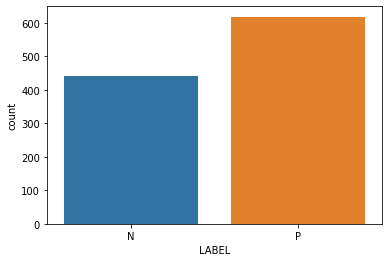

In [ ]:
visual = sns.countplot(teks['LABEL'])
#visual.set_xticklabels(['Negatif','Positif'])
plt.show()

# Preprocessing

## Case Folding

In [ ]:
teks['CASEFOLDING'] = teks['ULASAN'].str.lower()
teks[['CASEFOLDING']]

,CASEFOLDING
0,"fitur terbaik:mirip hp jadul\nsepadan dengan harga:harga yang pantas 155 ribu\n\nhp nya super lemot ,batre cepat terkuras dlm hitungan detik.jaringan buruk internetan bikin emosi.sangat tidak memuaskan. semua orang beranggapan dan memberi saran kepada saya bahwa saya kena tipu."
1,hp apaan a hp mgak berguna nysel saya pesan
2,kurang memuaskan tak sesuai penawaran
3,"baterai nya cepat habis, jaringan nya lemot pula"
4,l. e. m. o. t
...,...
1054,"kualitas harga sangat bagus, saya memilih yang ini dibagikan dengan beberapa pengguna keluarga rambut ekstra membuat peralihan antar profil pengguna lebih cepat dengan sedikit atau tanpa jeda segala sesuatu yang ain cukup standar resolusi layar hd jga bagus"
1055,kualitas produk sangat baik alhamdulillah sudah sampai dengan baik produknya kualitasnya juga mantap maksih seller
1056,kualitas produk sangat baik dikemas dengan baik sekali tanpa kendala makasih ya seller
1057,"thanks seller produk nya sangat berfungsi dengan baik , tidak ada kendala apapun saat pengiriman"


## Cleaning

In [ ]:
def remove_punct(text):
    #Remove Karakter ASCII, angka, punctuation
    text = text.encode('ascii', 'replace').decode('ascii')
    text = re.sub('x(\d+[a-zA-Z]+|[a-zA-Z]+\d+|\d+)',"",text)
    text = re.sub('[0-9]+', '', text)
    text = re.sub(r'[\W\s_]',' ',text)

    #Remove spasi diawal dan akhir, url, hastag, tagar, kata akhiran berlebihan, baris baru, tab
    text = re.sub("^\s+|\s+$", "", text)
    text = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text) #url
    text = re.sub("@[A-Za-z0-9]+","", text)
    text = re.sub("#[A-Za-z0-9]+","", text)
    pola = re.compile(r'(.)\1{2,}', re.DOTALL)
    text = pola.sub(r'\1', text)
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\'," ") 
    return text

teks['CLEANING'] = teks['CASEFOLDING'].apply(lambda x: remove_punct(x))
teks[['CLEANING']]

,CLEANING
0,fitur terbaik mirip hp jadul sepadan dengan harga harga yang pantas ribu hp nya super lemot batre cepat terkuras dlm hitungan detik jaringan buruk internetan bikin emosi sangat tidak memuaskan semua orang beranggapan dan memberi saran kepada saya bahwa saya kena tipu
1,hp apaan a hp mgak berguna nysel saya pesan
2,kurang memuaskan tak sesuai penawaran
3,baterai nya cepat habis jaringan nya lemot pula
4,l e m o t
...,...
1054,kualitas harga sangat bagus saya memilih yang ini dibagikan dengan beberapa pengguna keluarga rambut ekstra membuat peralihan antar profil pengguna lebih cepat dengan sedikit atau tanpa jeda segala sesuatu yang ain cukup standar resolusi layar hd jga bagus
1055,kualitas produk sangat baik alhamdulillah sudah sampai dengan baik produknya kualitasnya juga mantap maksih seller
1056,kualitas produk sangat baik dikemas dengan baik sekali tanpa kendala makasih ya seller
1057,thanks seller produk nya sangat berfungsi dengan baik tidak ada kendala apapun saat pengiriman


## Normalization

In [ ]:
#Normalisasi slang

normalized_word = pd.read_excel("https://github.com/ivanmasyudi/Big-Data/blob/main/kamus%20perbaikan%20kata.xlsx?raw=true")

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
  if row[0] not in normalized_word_dict:
    normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return ' '.join([normalized_word_dict[term] if term in normalized_word_dict else term for term in document.split()])

teks['NORMALISASI'] = teks['CLEANING'].apply(lambda x: normalized_term(x))
teks[['NORMALISASI']]

,NORMALISASI
0,fitur terbaik mirip handphone kuno sepadan dengan harga harga yang pantas ribu handphone nya super lambat berfikir batre cepat terkuras dalam hitungan detik jaringan buruk internetan membuat emosi sangat tidak memuaskan semua orang beranggapan dan memberi saran kepada saya bahwa saya kena tipu
1,handphone apa a handphone mgak berguna nysel saya pesan
2,kurang memuaskan tidak sesuai penawaran
3,baterai nya cepat habis jaringan nya lambat berfikir pula
4,l e m o t
...,...
1054,kualitas harga sangat bagus saya memilih yang ini dibagikan dengan beberapa pengguna keluarga rambut ekstra membuat peralihan antar profil pengguna lebih cepat dengan sedikit atau tanpa jeda segala sesuatu yang ain cukup standar resolusi layar hd juga bagus
1055,kualitas produk sangat baik syukur sudah sampai dengan baik produknya kualitasnya juga mantap maksih seller
1056,kualitas produk sangat baik dikemas dengan baik sekali tanpa kendala terima kasih iya seller
1057,terima kasih seller produk nya sangat berfungsi dengan baik tidak ada kendala apapun saat pengiriman


## Tokenizing

In [ ]:
def tokenization(text):
  
    text = nltk.tokenize.word_tokenize(text)
    return text

teks['TOKENISASI'] = teks['NORMALISASI'].apply(lambda x: tokenization(x))
teks[['TOKENISASI']]

,TOKENISASI
0,"[fitur, terbaik, mirip, handphone, kuno, sepadan, dengan, harga, harga, yang, pantas, ribu, handphone, nya, super, lambat, berfikir, batre, cepat, terkuras, dalam, hitungan, detik, jaringan, buruk, internetan, membuat, emosi, sangat, tidak, memuaskan, semua, orang, beranggapan, dan, memberi, saran, kepada, saya, bahwa, saya, kena, tipu]"
1,"[handphone, apa, a, handphone, mgak, berguna, nysel, saya, pesan]"
2,"[kurang, memuaskan, tidak, sesuai, penawaran]"
3,"[baterai, nya, cepat, habis, jaringan, nya, lambat, berfikir, pula]"
4,"[l, e, m, o, t]"
...,...
1054,"[kualitas, harga, sangat, bagus, saya, memilih, yang, ini, dibagikan, dengan, beberapa, pengguna, keluarga, rambut, ekstra, membuat, peralihan, antar, profil, pengguna, lebih, cepat, dengan, sedikit, atau, tanpa, jeda, segala, sesuatu, yang, ain, cukup, standar, resolusi, layar, hd, juga, bagus]"
1055,"[kualitas, produk, sangat, baik, syukur, sudah, sampai, dengan, baik, produknya, kualitasnya, juga, mantap, maksih, seller]"
1056,"[kualitas, produk, sangat, baik, dikemas, dengan, baik, sekali, tanpa, kendala, terima, kasih, iya, seller]"
1057,"[terima, kasih, seller, produk, nya, sangat, berfungsi, dengan, baik, tidak, ada, kendala, apapun, saat, pengiriman]"


## Stopword


In [ ]:
url = 'https://github.com/ivanmasyudi/Big-Data/blob/main/Stoplist.xlsx?raw=true'
stoplist = pd.read_excel(url)

list_stopwords = set(stoplist['STOPLIST'])

hapus = ["tidak","baik","kurang"]
for i in hapus:
    if i in list_stopwords:
        list_stopwords.remove(i)

In [ ]:
#StopList
#url = 'https://github.com/ivanmasyudi/Big-Data/blob/main/Stoplist.xlsx?raw=true'
#stoplist = pd.read_excel(url)

#list_stopwords = set(stoplist['STOPLIST'])

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

teks['STOPWORD'] = teks['TOKENISASI'].apply(lambda x: stopwords_removal(x))
teks[['STOPWORD']]

,STOPWORD
0,"[fitur, terbaik, handphone, kuno, sepadan, harga, harga, ribu, handphone, nya, super, lambat, berfikir, batre, cepat, terkuras, hitungan, detik, jaringan, buruk, internetan, emosi, tidak, memuaskan, orang, beranggapan, saran, kena, tipu]"
1,"[handphone, a, handphone, mgak, berguna, nysel, pesan]"
2,"[kurang, memuaskan, tidak, sesuai, penawaran]"
3,"[baterai, nya, cepat, habis, jaringan, nya, lambat, berfikir]"
4,"[l, e, m, o, t]"
...,...
1054,"[kualitas, harga, bagus, memilih, dibagikan, pengguna, keluarga, rambut, ekstra, peralihan, profil, pengguna, cepat, jeda, ain, standar, resolusi, layar, hd, bagus]"
1055,"[kualitas, produk, baik, syukur, baik, produknya, kualitasnya, mantap, maksih, seller]"
1056,"[kualitas, produk, baik, dikemas, baik, kendala, terima, kasih, iya, seller]"
1057,"[terima, kasih, seller, produk, nya, berfungsi, baik, tidak, kendala, apapun, pengiriman]"


In [ ]:
for row in teks['STOPWORD'].index:
    print(row, end = " ")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [ ]:
for row in teks.index:
    a =  teks['STOPWORD'][row]
    if len(a) == 0:
        teks.drop(row, axis=0, inplace=True)
print(len(teks))

1057


In [ ]:
print(len(teks['ID_PRODUK']))

1057


In [ ]:
for row in teks.index:
    a =  teks['STOPWORD'][row]
    if len(a) == 0:
        teks.drop(row, axis=0, inplace=True)
teks['STOPWORD'] = teks['TOKENISASI'].apply(lambda x: stopwords_removal(x))
teks[['STOPWORD']]

,STOPWORD
0,"[fitur, terbaik, handphone, kuno, sepadan, harga, harga, ribu, handphone, nya, super, lambat, berfikir, batre, cepat, terkuras, hitungan, detik, jaringan, buruk, internetan, emosi, tidak, memuaskan, orang, beranggapan, saran, kena, tipu]"
1,"[handphone, a, handphone, mgak, berguna, nysel, pesan]"
2,"[kurang, memuaskan, tidak, sesuai, penawaran]"
3,"[baterai, nya, cepat, habis, jaringan, nya, lambat, berfikir]"
4,"[l, e, m, o, t]"
...,...
1054,"[kualitas, harga, bagus, memilih, dibagikan, pengguna, keluarga, rambut, ekstra, peralihan, profil, pengguna, cepat, jeda, ain, standar, resolusi, layar, hd, bagus]"
1055,"[kualitas, produk, baik, syukur, baik, produknya, kualitasnya, mantap, maksih, seller]"
1056,"[kualitas, produk, baik, dikemas, baik, kendala, terima, kasih, iya, seller]"
1057,"[terima, kasih, seller, produk, nya, berfungsi, baik, tidak, kendala, apapun, pengiriman]"


## Stemming

In [ ]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    text = [stemmer.stem(word) for word in text]
    return text

teks['STEMMING'] = teks['STOPWORD'].apply(lambda x: stemming(x))
teks[['STEMMING']]

,STEMMING
0,"[fitur, baik, handphone, kuno, padan, harga, harga, ribu, handphone, nya, super, lambat, berfikir, batre, cepat, kuras, hitung, detik, jaring, buruk, internetan, emosi, tidak, muas, orang, anggap, saran, kena, tipu]"
1,"[handphone, a, handphone, mgak, guna, nysel, pesan]"
2,"[kurang, muas, tidak, sesuai, tawar]"
3,"[baterai, nya, cepat, habis, jaring, nya, lambat, berfikir]"
4,"[l, e, m, o, t]"
...,...
1054,"[kualitas, harga, bagus, pilih, bagi, guna, keluarga, rambut, ekstra, alih, profil, guna, cepat, jeda, ain, standar, resolusi, layar, hd, bagus]"
1055,"[kualitas, produk, baik, syukur, baik, produk, kualitas, mantap, maksih, seller]"
1056,"[kualitas, produk, baik, kemas, baik, kendala, terima, kasih, iya, seller]"
1057,"[terima, kasih, seller, produk, nya, fungsi, baik, tidak, kendala, apa, kirim]"


In [ ]:
a = teks['STEMMING'] #ini variabel a buat nanti disimpen di pickle biar kita ga ngerun stemming terus setiap mau memroses data karena lamaaaa:((
a

0       [fitur, baik, handphone, kuno, padan, harga, harga, ribu, handphone, nya, super, lambat, berfikir, batre, cepat, kuras, hitung, detik, jaring, buruk, internetan, emosi, tidak, muas, orang, anggap, saran, kena, tipu]
1                                                                                                                                                                           [handphone, a, handphone, mgak, guna, nysel, pesan]
2                                                                                                                                                                                          [kurang, muas, tidak, sesuai, tawar]
3                                                                                                                                                                   [baterai, nya, cepat, habis, jaring, nya, lambat, berfikir]
4                                                                                                       

In [ ]:
import pickle
list_stem = []

for tokenstm in a:
    list_stem.append(tokenstm)
    print(tokenstm)
    
with open('list_stem.pkl','wb') as s:
    pickle.dump(list_stem,s)

['fitur', 'baik', 'handphone', 'kuno', 'padan', 'harga', 'harga', 'ribu', 'handphone', 'nya', 'super', 'lambat', 'berfikir', 'batre', 'cepat', 'kuras', 'hitung', 'detik', 'jaring', 'buruk', 'internetan', 'emosi', 'tidak', 'muas', 'orang', 'anggap', 'saran', 'kena', 'tipu']
['handphone', 'a', 'handphone', 'mgak', 'guna', 'nysel', 'pesan']
['kurang', 'muas', 'tidak', 'sesuai', 'tawar']
['baterai', 'nya', 'cepat', 'habis', 'jaring', 'nya', 'lambat', 'berfikir']
['l', 'e', 'm', 'o', 't']
['kamera', 'kurang', 'bagus']
['fitur', 'baik', 'memori', 'padan', 'harga', 'overal', 'oke', 'kondisi', 'normal', 'mewah', 'kurang', 'temperglass', 'pecah', 'camera', 'resolusi', 'rendah', 'oke', 'sesuai', 'harga', 'terima', 'kasih']
['kabel', 'cas', 'nya', 'tidak', 'tidak', 'segel', 'kardus', 'nya', 'kamera', 'nya', 'jelek']
['fitur', 'baik', 'lumayan', 'padan', 'harga', 'lumayan', 'lumayan', 'main', 'game', 'lambat', 'sih', 'bilang', 'ram', 'lambat', 'barang', 'ya', 'sih', 'ok']
['toko', 'iya', 'sukses',

# Ekstraksi Fitur

## TF-IDF

In [ ]:
c = [x for x in a]
#print (c)
corpus = [' '.join(i) for i in c]
corpus

['fitur baik handphone kuno padan harga harga ribu handphone nya super lambat berfikir batre cepat kuras hitung detik jaring buruk internetan emosi tidak muas orang anggap saran kena tipu',
 'handphone a handphone mgak guna nysel pesan',
 'kurang muas tidak sesuai tawar',
 'baterai nya cepat habis jaring nya lambat berfikir',
 'l e m o t',
 'kamera kurang bagus',
 'fitur baik memori padan harga overal oke kondisi normal mewah kurang temperglass pecah camera resolusi rendah oke sesuai harga terima kasih',
 'kabel cas nya tidak tidak segel kardus nya kamera nya jelek',
 'fitur baik lumayan padan harga lumayan lumayan main game lambat sih bilang ram lambat barang ya sih ok',
 'toko iya sukses depan produk bagus baik tidak kendala apa suka',
 'kualitas produk baikk harga jangkau respon seller baik terima kasih',
 'langsung beli unit syukur aman mulus jugaa terbaikk',
 'kali pesan dsini barang muas original ragu pesan iya',
 'kirim cepat harga segitu spek nfc ram puas terima kasih',
 'syuku

In [ ]:
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(corpus) 
print(x_tfidf)

  (0, 1662)	0.1770432065646844
  (0, 773)	0.2302881851444316
  (0, 1376)	0.25614915060507315
  (0, 70)	0.2712768456319935
  (0, 1121)	0.19867593695689972
  (0, 1026)	0.16343855919622816
  (0, 1652)	0.07038409911704024
  (0, 447)	0.25614915060507315
  (0, 649)	0.20767356948960458
  (0, 257)	0.19143207573340423
  (0, 681)	0.17150573236918779
  (0, 371)	0.2712768456319935
  (0, 608)	0.2712768456319935
  (0, 839)	0.25614915060507315
  (0, 291)	0.09573513199337125
  (0, 143)	0.16343855919622816
  (0, 173)	0.1360545460771225
  (0, 856)	0.12421845190658827
  (0, 1557)	0.1961018483410978
  (0, 1085)	0.08088987197624126
  (0, 1328)	0.24541588017135194
  (0, 589)	0.20004838450090714
  (0, 1138)	0.1386286346929244
  (0, 836)	0.1835482419299794
  (0, 581)	0.16816942135632695
  :	:
  (1055, 798)	0.27614217223103654
  (1055, 1417)	0.2612976739352399
  (1055, 75)	0.49338535931153377
  (1055, 776)	0.40953254562558794
  (1055, 1238)	0.2701419867197546
  (1055, 745)	0.22798401075875419
  (1055, 1628)	0.

In [ ]:
pickle.dump(tfidf, open('vect_tfidf.pkl', 'wb'))

In [ ]:
vect = pickle.load(open('vect_tfidf.pkl', 'rb'))

In [ ]:
vect

<1057x1780 sparse matrix of type '<class 'numpy.float64'>'
	with 12868 stored elements in Compressed Sparse Row format>

In [ ]:
dftfidf = pd.DataFrame(x_tfidf.todense(),
                 index=[f'D{i+1}' for i in range (len(corpus))],
                 columns=tfidf.get_feature_names_out()) 
# dftfidf.insert(-1,"LABEL",label)


In [ ]:
dftfidf.to_csv('datasett.csv')

In [ ]:
tfidf.vocabulary_

{'fitur': 483,
 'baik': 108,
 'handphone': 581,
 'kuno': 836,
 'padan': 1138,
 'harga': 589,
 'ribu': 1328,
 'nya': 1085,
 'super': 1557,
 'lambat': 856,
 'berfikir': 173,
 'batre': 143,
 'cepat': 291,
 'kuras': 839,
 'hitung': 608,
 'detik': 371,
 'jaring': 681,
 'buruk': 257,
 'internetan': 649,
 'emosi': 447,
 'tidak': 1652,
 'muas': 1026,
 'orang': 1121,
 'anggap': 70,
 'saran': 1376,
 'kena': 773,
 'tipu': 1662,
 'mgak': 991,
 'guna': 562,
 'nysel': 1104,
 'pesan': 1188,
 'kurang': 838,
 'sesuai': 1447,
 'tawar': 1594,
 'baterai': 135,
 'habis': 568,
 'kamera': 733,
 'bagus': 98,
 'memori': 967,
 'overal': 1130,
 'oke': 1111,
 'kondisi': 811,
 'normal': 1078,
 'mewah': 989,
 'temperglass': 1616,
 'pecah': 1157,
 'camera': 270,
 'resolusi': 1311,
 'rendah': 1304,
 'terima': 1628,
 'kasih': 745,
 'kabel': 718,
 'cas': 281,
 'segel': 1402,
 'kardus': 743,
 'jelek': 693,
 'lumayan': 910,
 'main': 921,
 'game': 509,
 'sih': 1469,
 'bilang': 191,
 'ram': 1265,
 'barang': 126,
 'ya': 176

# Klasifikasi MAXENT

In [ ]:
import nltk, nltk.classify.util, nltk.metrics, pandas as pd, numpy as np, pickle as pkl, sys, io
from nltk.classify import MaxentClassifier
from contextlib import redirect_stdout
from sklearn.metrics import confusion_matrix as cm, classification_report as cr

def getlabel(xlsx):
    book = pd.read_excel(xlsx)
    label=list(book["LABEL"])
    print("Jumlah label :",len(label))
    return  label

def getdata(csv):
    data=[]
    docid=[]
    book=pd.read_csv(csv)
    print("Shape :",book.shape) #formatnya (jumlah data, jumlah fitur)
    for i in range(book.shape[0]):
        row = book.iloc[i][1:].to_dict()
        id = book.iloc[i][0]
        data.append(row)
        docid.append(id)
    return data, docid

def getdata_v2(csv): #misal udh jadi 1 antara label sama tf-idf
    data=[]
    docid=[]
    label_list=[]
    book=pd.read_csv(csv)
    print("Shape :",book.shape) #formatnya (jumlah data, jumlah fitur)
    for i in range(book.shape[0]):
        row = book.iloc[i][1:-1].to_dict()
        id = book.iloc[i][0]
        label = book.iloc[i][-1]
        data.append(row)
        docid.append(id)
        label_list.append(label)
    return data, docid, label_list

def joindata(data,label):
    dataset=[]
    for i in range(len(data)):
        row=[data[i],label[i]]
        dataset.append(row)
    return dataset
    
def measure(true_label, pred_label):
    print("Confusion Matrix :")
    tn, fp, fn, tp = cm(true_label,pred_label).ravel()
    print([tn, fp])
    print([fn, tp])
    print()
    
    print("CLassification Report :")
    print(cr(true_label,pred_label)) #offin aja line ini kalo mw manual

    accur=(tp+tn)/(tp+tn+fp+fn) # ini versi hitung manual
    prec=((tp/(tp+fp)) + (tn/(tn+fn)))/2
    rec=((tp/(tp+fn)) + (tn/(tn+fp)))/2
    f1=2*((prec*rec)/(prec+rec))

    print("Accuracy :",accur)
    print("precicion :",prec)
    print("Recall :",rec)
    print("F1-score :",f1)

def bagidata(data, label, id, train=0.8):
    rasio=int(train*len(data))
    fitur_train, label_train = data[:rasio], label[:rasio]
    fitur_test, test_label = data[rasio:], label[rasio:]
    id_train, id_test= id[:rasio], id[rasio:]
    print(len(fitur_train),len(label_train))
    print(len(fitur_test),len(test_label))
    return fitur_train, label_train, fitur_test, test_label, id_train, id_test
    
def TrainMaxEntropy(data_train, iter=10):
    algo = nltk.classify.MaxentClassifier.ALGORITHMS[0]
    model = MaxentClassifier.train(data_train, algo, max_iter=iter)
    return model

def savemodel(model,filename):
    pkl.dump(model, open(filename, 'wb'))
    
def loadmodel(filename):
    model = pkl.load(open(filename, 'rb'))
    return model

In [ ]:
book=pd.read_csv(r"/content/drive/MyDrive/smt 8/data scraping shopee/hasil_tfidf/datasett.csv")
book

,Unnamed: 0,abal,abang,abru,abu,ada,adaptor,adayang,adekku,adik,...,yh,you,youtobe,youtube,yt,ytb,yutub,yv,zong,zonkk
0,D1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,D2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,D3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,D4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,D5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,D1053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1053,D1054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1054,D1055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1055,D1056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Load Dataset

In [ ]:
data, id= getdata(r"/content/drive/MyDrive/smt 8/data scraping shopee/hasil_tfidf/datasett.csv")
label = getlabel(r"/content/drive/MyDrive/smt 8/data scraping shopee/scrapinggg/DATASET.xlsx") 

# data, id= getdata(r"/content/drive/MyDrive/smt 8/data scraping shopee/hasil_tfidf/datasett.csv")
# label = getlabel(r"/content/drive/MyDrive/smt 8/data scraping shopee/scrapinggg/DATASET.xlsx") 

newlabel=["negatif" if i == "N" else "positif" for i in label]
newlabel=newlabel[:len(data)] #limit beda jumlah data disini

print("\nJumlah data Negatif : ",len([ i for i in label if i == "N"]))
print("Jumlah data Positif : ",len([ i for i in label if i == "P"]))

fitur_train, label_train, fitur_test, label_test, id_train, id_test = bagidata(data, newlabel, id, train=0.8) 

data_train=joindata(fitur_train, label_train)

Shape : (1057, 1783)
Jumlah label : 1059

Jumlah data Negatif :  441
Jumlah data Positif :  618
845 845
212 212


In [ ]:
data_train[0] #sampel data, format data = [{word/tfidf : bobot}, label]

[{'abal': 0.0,
  'abang': 0.0,
  'abru': 0.0,
  'abu': 0.0,
  'ada': 0.0,
  'adaptor': 0.0,
  'adayang': 0.0,
  'adekku': 0.0,
  'adik': 0.0,
  'adli': 0.0,
  'admin': 0.0,
  'adminny': 0.0,
  'adminnya': 0.0,
  'aduh': 0.0,
  'adv': 0.0,
  'advan': 0.0,
  'adx': 0.0,
  'af': 0.0,
  'aga': 0.0,
  'agan': 0.0,
  'agx': 0.0,
  'ah': 0.0,
  'ahh': 0.0,
  'ai': 0.0,
  'ain': 0.0,
  'aismart': 0.0,
  'ajah': 0.0,
  'ajar': 0.0,
  'ajh': 0.0,
  'ajha': 0.0,
  'ajirr': 0.0,
  'aju': 0.0,
  'ajuin': 0.0,
  'akal': 0.0,
  'akh': 0.0,
  'akhirat': 0.0,
  'akhirny': 0.0,
  'akhirnyaas': 0.0,
  'akirnya': 0.0,
  'akomodatif': 0.0,
  'aksesoris': 0.0,
  'aktual': 0.0,
  'akuwin': 0.0,
  'alam': 0.0,
  'alamat': 0.0,
  'alat': 0.0,
  'alhamdulillab': 0.0,
  'alhamdullilah': 0.0,
  'alhamrhp': 0.0,
  'alhmd': 0.0,
  'alhmdllah': 0.0,
  'alhmdllh': 0.0,
  'alhmduliah': 0.0,
  'alias': 0.0,
  'alih': 0.0,
  'all': 0.0,
  'allah': 0.0,
  'aman': 0.0,
  'amanah': 0.0,
  'ambil': 0.0,
  'aminn': 0.0,
  'a

## Training Data dengan Maxent

In [ ]:
model = TrainMaxEntropy(data_train,iter=10) #iterasi bisa ditambah, disini coba 10 aja (fyi : log dibawah ini akurasi Training)

  ==> Training (10 iterations)

      Iteration    Log Likelihood    Accuracy
      ---------------------------------------
             1          -0.69315        0.562
             2          -0.66923        0.562
             3          -0.66077        0.562
             4          -0.65250        0.562
             5          -0.64437        0.563
             6          -0.63637        0.564
             7          -0.62850        0.579
             8          -0.62076        0.601
             9          -0.61315        0.626
         Final          -0.60567        0.646


In [ ]:
model.show_most_informative_features(10, show="neg") #melihat nilai bobot yg negatif dari training

  -0.014 Correction feature (1783)
  -0.003 tidak==0.0 and label is 'negatif'
  -0.002 terima==0.0 and label is 'positif'
  -0.002 kasih==0.0 and label is 'positif'
  -0.001 bagus==0.0 and label is 'positif'
  -0.001 seller==0.0 and label is 'positif'
  -0.001 lambat==0.0 and label is 'negatif'
  -0.001 berfikir==0.0 and label is 'negatif'
  -0.001 handphone==0.0 and label is 'negatif'
  -0.001 kecewa==0.0 and label is 'negatif'


In [ ]:
model.show_most_informative_features(10, show="pos") #melihat nilai bobot yg negatif dari training

   0.006 smar==1.0 and label is 'negatif'
   0.006 sesuai==0.4207875725986959 and label is 'negatif'
   0.006 spesifikasi==0.907159202536411 and label is 'negatif'
   0.006 handphone==0.2960630774622528 and label is 'negatif'
   0.006 supercopy==0.955168390475512 and label is 'negatif'
   0.006 berfikir==0.7384997214702089 and label is 'negatif'
   0.006 lambat==0.67425378114507 and label is 'negatif'
   0.006 asli==0.9337054095468248 and label is 'negatif'
   0.006 tidak==0.3580421877139564 and label is 'negatif'
   0.006 memory==0.9513521777488736 and label is 'negatif'


## Evaluasi DataTest

In [ ]:
label_pred=[model.classify(i) for i in fitur_test]
measure(label_test, label_pred)
savemodel(model,"MaxEntropy.pkl")

Confusion Matrix :
[15, 56]
[1, 140]

CLassification Report :
              precision    recall  f1-score   support

     negatif       0.94      0.21      0.34        71
     positif       0.71      0.99      0.83       141

    accuracy                           0.73       212
   macro avg       0.83      0.60      0.59       212
weighted avg       0.79      0.73      0.67       212

Accuracy : 0.7311320754716981
precicion : 0.8258928571428572
Recall : 0.6020877035261213
F1-score : 0.6964519649802714


## Test SingleData

In [ ]:
dokumen=0 #max index 211 di data test
f = io.StringIO()
with redirect_stdout(f):
  model.explain(fitur_test[dokumen]) #contoh penejelasan pada dokumen index ke 0, tinggal ubah index di variabel dokumen
hasil = f.getvalue()

In [ ]:
hasil = {}
for i in range(211):
  hasil[i] = model.classify(fitur_test[dokumen])
pd.DataFrame(hasil.items(), columns=['Dokumen', 'Prediksi'])

,Dokumen,Prediksi
0,0,positif
1,1,positif
2,2,positif
3,3,positif
4,4,positif
...,...,...
206,206,positif
207,207,positif
208,208,positif
209,209,positif


In [ ]:
print(">> ID Dokumen [",id_test[dokumen],"] :")
print(hasil)
print(">>> Hasil Klasifikasi tersebut :", model.classify(fitur_test[dokumen])) #kalau klasifikasi tanpa explanation (penjelasan) bisa pakai classify

>> ID Dokumen [ D846 ] :
  Feature                                          positif negatif
  ----------------------------------------------------------------
  Correction feature (1783) (13)                    -0.179
  lambat==0.0 (1)                                    0.001
  berfikir==0.0 (1)                                  0.001
  produk==0.0 (1)                                   -0.001
  handphone==0.0 (1)                                 0.001
  kecewa==0.0 (1)                                    0.001
  baik==0.0 (1)                                     -0.001
  fitur==0.0 (1)                                     0.001
  banget==0.0 (1)                                   -0.000
  sesuai==0.0 (1)                                    0.000
  pakai==0.0 (1)                                     0.000
  kamera==0.0 (1)                                    0.000
  ram==0.0 (1)                                       0.000
  syukur==0.0 (1)                                   -0.000
  padan==0.0 (1